In [1]:
%matplotlib inline

#%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_to_load = pd.read_csv(city_data_to_load)
ride_data_to_load = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_ridecity_df = pd.merge(ride_data_to_load, city_data_to_load,
                                 how='left', on='city')
# Display the data table for preview

city_data_to_load.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


## Bubble Plot of Ride Sharing Data

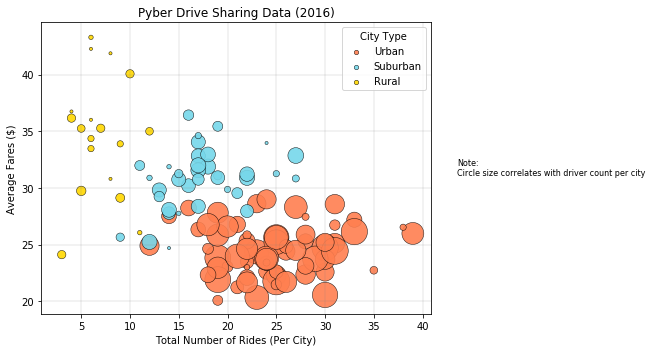

<Figure size 432x288 with 0 Axes>

In [2]:
# Obtain the x and y coordinates for each of the three city types

x=ride_data_to_load.groupby(['city']).agg({'fare':'mean'})
x['Total_ride']=ride_data_to_load.groupby(['city']).agg({'city': 'count'})

x=x.reset_index(None)

# Combine the data into a single dataset

combined_ride = pd.merge(city_data_to_load, x, how='left', on='city')


# Display the data table for preview
combined_ride.head()

# Build the scatter plots for each city types

x  = combined_ride["Total_ride"]
y  = combined_ride["fare"]
s  = combined_ride["driver_count"] * 10
ct = combined_ride["type"]
unique_city_type = ct.unique()
ct_colors ={"Urban":"#FF7F50", "Suburban":"#76D7EA","Rural":"#FFD700"}
fig, ax = plt.subplots(figsize=(8,5))
for i, city_type in enumerate(unique_city_type):
   xi = [x[j] for j  in range(len(x)) if ct[j] == city_type]
   yi = [y[j] for j  in range(len(x)) if ct[j] == city_type]
   si = [s[j] for j  in range(len(x)) if ct[j] == city_type]
   plt.scatter(x=xi, y=yi, s=si, c=ct_colors[city_type], label=str(city_type), linewidths=0.5, edgecolors="black",alpha=0.9)

# Create a legend
lgnd = plt.legend(frameon=True,title="City Type",loc="upper right")
for handle in lgnd.legendHandles:
   handle.set_sizes([20])

# Incorporate the other graph properties
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
ax.set_title('Pyber Drive Sharing Data (2016)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fares ($)')

# Incorporate a text label regarding circle size
note = f"Note:\nCircle size correlates with driver count per city"
plt.text(0.8, 0.5, note, fontsize=8, transform=plt.gcf().transFigure)

# Save Figure

plt.savefig('BubblePlotRideSharingData2.png')

# Show plot
plt.tight_layout()
plt.show()


## Total Fares by City Type

In [3]:
# New dataframe copied from the original combined file
citytypefare = combined_ridecity_df.copy()
#citytypefares.head()
# Get the total fare amount 
total_fare = citytypefare['fare'].sum()
total_fare

63538.64

In [4]:
# Calculate Type Percents
citytypefares = citytypefare.groupby(['type'])["fare"].agg([("Total Number of Rides (per City)","count")]).join(\
            citytypefare.groupby(["type"])["fare"].agg([("Average Fare $","sum")])/total_fare)

rural = citytypefares.iloc[0,1] 
suburban = citytypefares.iloc[1,1]
urban = citytypefares.iloc[2,1]

citytypefares.head()


,Total Number of Rides (per City),Average Fare $
type,,
Rural,125,0.068115
Suburban,625,0.304639
Urban,1625,0.627246


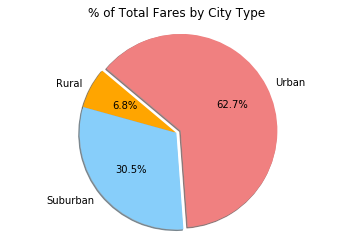

In [5]:
 # Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [rural, suburban, urban]

# The colors of each section of the pie chart
colors = ["orange","lightskyblue","lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# create a pie chart based upon the above data

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, pctdistance=0.6, labeldistance=1.1,radius=2, )
# Add title
plt.title("% of Total Fares by City Type ")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig('TotalFaresbyCityType.png')
plt.show()

#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
 #       autopct="%1.1f%%", shadow=True, startangle=140)

## Total Rides by City Type

In [6]:
# Copy a new dataframe to held the results
rides_ctype = combined_ridecity_df.copy()
rides_ctype.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
# Calculate Ride Percents
rides_ctype_df = rides_ctype.groupby(['type'])["driver_count"].agg([("Total Number of Rides (per City)","count")]).join(\
            rides_ctype.groupby(["type"])["fare"].agg([("Average Fare $","sum")]))


rides_ctype_df.head()

,Total Number of Rides (per City),Average Fare $
type,,
Rural,125,4327.93
Suburban,625,19356.33
Urban,1625,39854.38


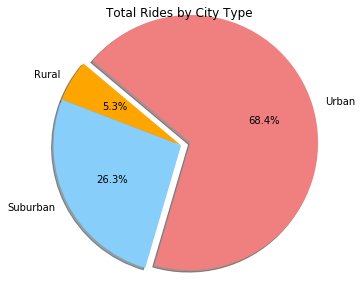

In [8]:
# Build Pie Chart
rural1 = rides_ctype_df.iloc[0,0] 
suburban1 = rides_ctype_df.iloc[1,0]
urban1 = rides_ctype_df.iloc[2,0]
urban1
labels = ["Rural", "Suburban", "Urban"]
sizes1 = [rural1, suburban1, urban1]


plt.pie(sizes1, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, pctdistance=0.6, labeldistance=1.1,radius=1.3)


# The colors of each section of the pie chart
colors = ["orange","lightskyblue","lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Add title
plt.title("Total Rides by City Type ")

# Save Figure
plt.savefig('TotalRidesbyCityType.png')

# Show Figure

plt.tight_layout()
plt.show()

## Total Drivers by City Type

In [9]:
# Copy a new dataframe to held the results
drivers_ctype = city_data_to_load.copy()
drivers_ctype.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [10]:
# Calculate Ride Percents
# Using GroupBy in order to separate the data into fields according to "type" values
drivers_ctype_df = drivers_ctype.groupby(['type'])["driver_count"].agg([("Total drivers by City Type)","sum")])
drivers_ctype_df.head()

,Total drivers by City Type)
type,
Rural,78
Suburban,490
Urban,2405


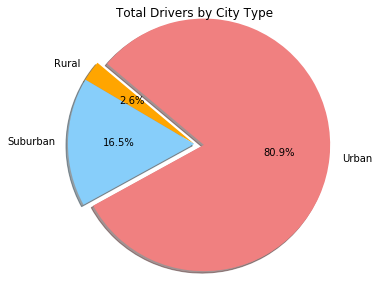

In [11]:
# Build Pie Chart
rural2 = drivers_ctype_df.iloc[0,0] 
suburban2 = drivers_ctype_df.iloc[1,0]
urban2 = drivers_ctype_df.iloc[2,0]

labels = ["Rural", "Suburban", "Urban"]
sizes2 = [rural2, suburban2, urban2]
plt.pie(sizes2, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, pctdistance=0.6, labeldistance=1.1,radius=1.3,)

# The colors of each section of the pie chart
colors = ["orange","lightskyblue","lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.15)

# Add title
plt.title('Total Drivers by City Type', loc='center')


# Save Figure
plt.savefig('TotalDriversbyCityType.png')

# Show Figure
plt.tight_layout()
plt.show()

